In [1]:
import numpy as np
import healpy as hp
import pymaster as nm 
import matplotlib.pyplot as plt

# Redshift bin 0.8-2.1

## Normalization

The possible options are: 
- an overall normalization (sepnorm = False)
- a separate normalization for N and S (sepnorm = True)

The separate normalization has two additional cases:
- Consider S as a whole (extrasepnorm = False)
- Separate S in S-DES, S-NGCnoDES and S-SGCnoDES (extrasepnorm = True)

$C_\ell$'s are computed using completeness 0.2, apodization scale 0.05 and linear weights. 

In [2]:
theory_file_path = "results/binned_theory_Cl_kk_kg_gg_lmin5.txt"
lbin_theory, Cl_theory_kk, Cl_theory_kg, Cl_theory_gg = np.loadtxt(theory_file_path, unpack=True)

#### With completeness 0.2, the maps for extrasepnorm are missing. Let's look at comp 0.0, which has new maps and all the necessary ones

In [3]:
lbin, Cl_overall_norm, sigma_overall_norm = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.05_comp0.0_cutoff0.2_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormFalse_old.txt", unpack = True)
_, Cl_sepnorm_old, sigma_sepnorm_old = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.05_comp0.0_cutoff0.2_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormTrue_old.txt", unpack = True)
_, Cl_sepnorm_new, sigma_sepnorm_new = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.05_comp0.0_cutoff0.2_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormTrue_new.txt", unpack = True)

lmax = 105
mask = lbin < lmax
lbin = lbin[mask]
Cl_overall_norm = Cl_overall_norm[mask]
sigma_overall_norm = sigma_overall_norm[mask]
Cl_sepnorm_old = Cl_sepnorm_old[mask]
sigma_sepnorm_old = sigma_sepnorm_old[mask]
Cl_sepnorm_new = Cl_sepnorm_new[mask]
sigma_sepnorm_new = sigma_sepnorm_new[mask]

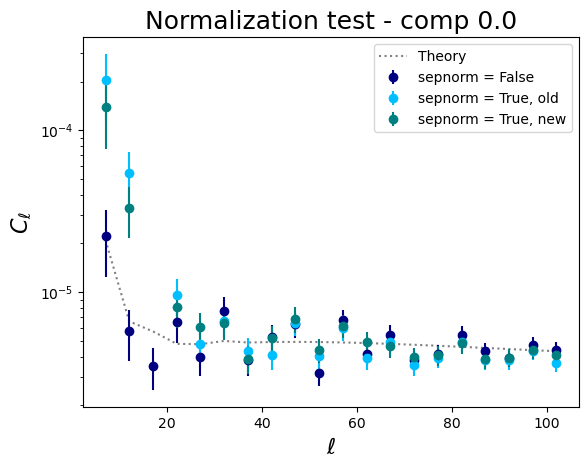

In [4]:
plt.figure()
plt.plot(lbin_theory[lbin_theory<lmax], Cl_theory_gg[lbin_theory<lmax], label = "Theory", color = "grey", linestyle = ":")
plt.errorbar(lbin, Cl_overall_norm, yerr=sigma_overall_norm, fmt='o', label="sepnorm = False", color="navy")
plt.errorbar(lbin, Cl_sepnorm_old, yerr=sigma_sepnorm_old, fmt='o', label="sepnorm = True, old", color="deepskyblue")
plt.errorbar(lbin, Cl_sepnorm_new, yerr=sigma_sepnorm_new, fmt='o', label="sepnorm = True, new", color="teal")
plt.yscale("log")
plt.title("Normalization test - comp 0.0", fontsize = 18)
plt.xlabel(r"$\ell$", fontsize = 16)
plt.ylabel(r"$C_\ell$", fontsize = 16)
plt.legend();

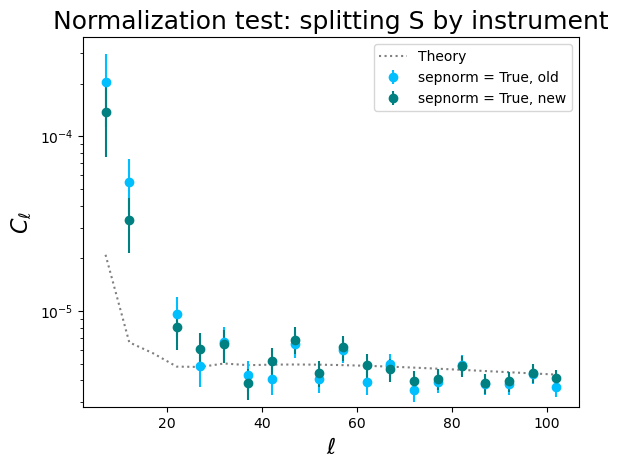

In [5]:
plt.figure()
plt.plot(lbin_theory[lbin_theory<lmax], Cl_theory_gg[lbin_theory<lmax], label = "Theory", color = "grey", linestyle = ":")
plt.errorbar(lbin, Cl_sepnorm_old, yerr=sigma_sepnorm_old, fmt='o', label="sepnorm = True, old", color="deepskyblue")
plt.errorbar(lbin, Cl_sepnorm_new, yerr=sigma_sepnorm_new, fmt='o', label="sepnorm = True, new", color="teal")
plt.yscale("log")
plt.title("Normalization test: splitting S by instrument", fontsize = 18)
plt.xlabel(r"$\ell$", fontsize = 16)
plt.ylabel(r"$C_\ell$", fontsize = 16)
plt.legend();

**What is going on here? Why is the overall normalization with comp 0.0 and cutoff 0.2 so good? Let's compare overall normalzations with different cutoffs**

## Cutoff

$C_\ell$'s are computed varying completeness, while apodization scale is 0.05, separate normalization is applied (not extra separate, masks are missing) and linear weights are employed. Also, **cut_off is fixed at 0.2**!!!

I have 0.0 (load previous file) and 0.2. For 0.5, files are missing (only old versions like v1.1 are available)

In [6]:
#_, Cl_comp02_cut0, sigma_comp02_cut0 = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.05_comp0.2_cutoff0.0_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormTrue_old.txt", unpack = True)
_, Cl_comp00_cut0, sigma_comp00_cut0 = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.05_comp0.0_cutoff0.0_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormTrue_old.txt", unpack = True)

#Cl_comp02_cut0 = Cl_comp02_cut0[mask]
#sigma_comp02_cut0 = sigma_comp02_cut0[mask]
Cl_comp00_cut0 = Cl_comp00_cut0[mask]
sigma_comp00_cut0 = sigma_comp00_cut0[mask]

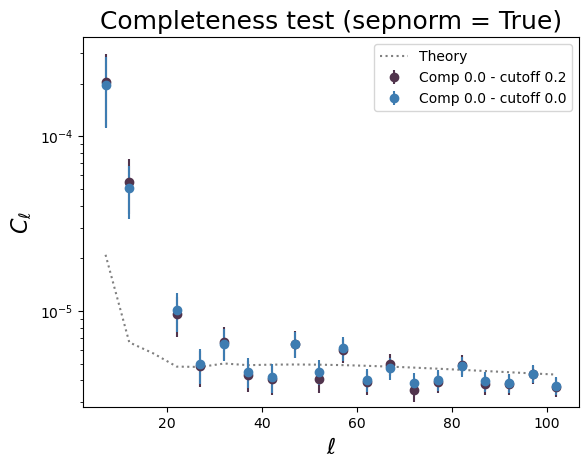

In [7]:
plt.figure()
plt.plot(lbin_theory[lbin_theory<lmax], Cl_theory_gg[lbin_theory<lmax], label = "Theory", color = "grey", linestyle = ":")
plt.errorbar(lbin, Cl_sepnorm_old, yerr=sigma_sepnorm_old, fmt='o', label="Comp 0.0 - cutoff 0.2", color="#51344D")
plt.errorbar(lbin, Cl_comp00_cut0, yerr=sigma_comp00_cut0, fmt='o', label="Comp 0.0 - cutoff 0.0", color="#3E7CB1")
plt.yscale("log")
plt.title("Completeness test (sepnorm = True)", fontsize = 18)
plt.xlabel(r"$\ell$", fontsize = 16)
plt.ylabel(r"$C_\ell$", fontsize = 16)
plt.legend();

In [8]:
_, Cl_overall_cut00, sigma_overall_cut00 = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.05_comp0.0_cutoff0.0_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormFalse_old.txt", unpack = True)

Cl_overall_cut00 = Cl_overall_cut00[mask]
sigma_overall_cut00 = sigma_overall_cut00[mask]

_, Cl_overall_cut05, sigma_overall_cut05 = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.05_comp0.0_cutoff0.5_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormFalse_old.txt", unpack = True)

Cl_overall_cut05 = Cl_overall_cut05[mask]
sigma_overall_cut05 = sigma_overall_cut05[mask]

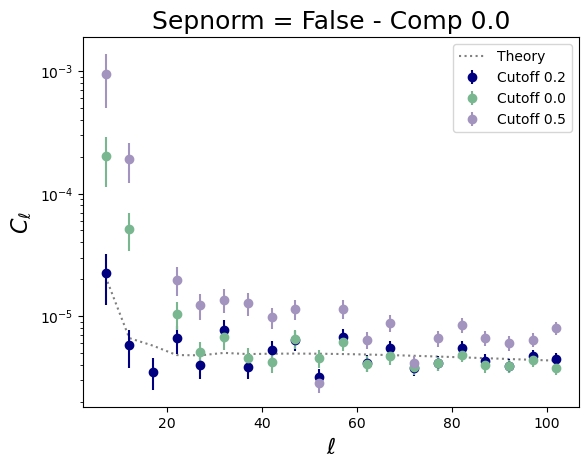

In [9]:
plt.figure()
plt.plot(lbin_theory[lbin_theory<lmax], Cl_theory_gg[lbin_theory<lmax], label = "Theory", color = "grey", linestyle = ":")
plt.errorbar(lbin, Cl_overall_norm, yerr=sigma_overall_norm, fmt='o', label="Cutoff 0.2", color="navy")
plt.errorbar(lbin, Cl_overall_cut00, yerr=sigma_overall_cut00, fmt='o', label="Cutoff 0.0", color="#79B791")
plt.errorbar(lbin, Cl_overall_cut05, yerr=sigma_overall_cut05, fmt='o', label="Cutoff 0.5", color="#A393BF")
plt.yscale("log")
plt.title("Sepnorm = False - Comp 0.0", fontsize = 18)
plt.xlabel(r"$\ell$", fontsize = 16)
plt.ylabel(r"$C_\ell$", fontsize = 16)
plt.legend();

### is it a bug I put somewhere? Compute $C_\ell$'s using the original script, before my modifications and setting sepnorm = False

In [10]:
_, Cl_overall_original, sigma_overall_original = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.05_comp0.0_cutoff0.2_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormFalse.txt", unpack = True)

Cl_overall_original = Cl_overall_original[mask]
sigma_overall_original = sigma_overall_original[mask]

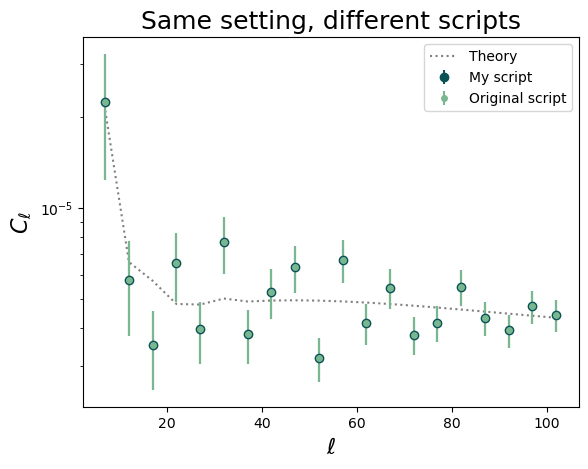

In [11]:
plt.figure()
plt.plot(lbin_theory[lbin_theory<lmax], Cl_theory_gg[lbin_theory<lmax], label = "Theory", color = "grey", linestyle = ":")
plt.errorbar(lbin, Cl_overall_norm, yerr=sigma_overall_norm, fmt='o', label="My script", color="#095256")
plt.errorbar(lbin, Cl_overall_original, yerr=sigma_overall_original, fmt='o', label="Original script", color="#79B791", markersize = 4)
plt.yscale("log")
plt.title("Same setting, different scripts", fontsize = 18)
plt.xlabel(r"$\ell$", fontsize = 16)
plt.ylabel(r"$C_\ell$", fontsize = 16)
plt.legend();

## Apodization scale 

Settling onto Sepnorm = False, completeness 0.0 and cutoff 0.2...

In [12]:
_, Cl_overall_075, sigma_overall_075 = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.075_comp0.0_cutoff0.2_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormFalse_old.txt", unpack = True)

Cl_overall_075 = Cl_overall_075[mask]
sigma_overall_075 = sigma_overall_075[mask]

_, Cl_overall_1, sigma_overall_1 = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.1_comp0.0_cutoff0.2_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormFalse_old.txt", unpack = True)

Cl_overall_1 = Cl_overall_1[mask]
sigma_overall_1 = sigma_overall_1[mask]

_, Cl_overall_04, sigma_overall_04 = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.04_comp0.0_cutoff0.2_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormFalse_old.txt", unpack = True)

Cl_overall_04 = Cl_overall_04[mask]
sigma_overall_04 = sigma_overall_04[mask]

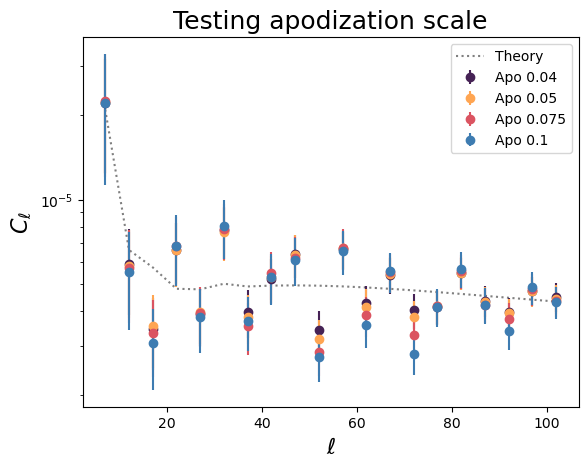

In [13]:
plt.figure()
plt.plot(lbin_theory[lbin_theory<lmax], Cl_theory_gg[lbin_theory<lmax], label = "Theory", color = "grey", linestyle = ":")
plt.errorbar(lbin, Cl_overall_04, yerr=sigma_overall_04, fmt='o', label="Apo 0.04", color="#462255")
plt.errorbar(lbin, Cl_overall_norm, yerr=sigma_overall_norm, fmt='o', label="Apo 0.05", color="#FFA552")
plt.errorbar(lbin, Cl_overall_075, yerr=sigma_overall_075, fmt='o', label="Apo 0.075", color="#DB5461")
plt.errorbar(lbin, Cl_overall_1, yerr=sigma_overall_1, fmt='o', label="Apo 0.1", color="#3E7CB1")
plt.yscale("log")
plt.title("Testing apodization scale", fontsize = 18)
plt.xlabel(r"$\ell$", fontsize = 16)
plt.ylabel(r"$C_\ell$", fontsize = 16)
plt.legend();

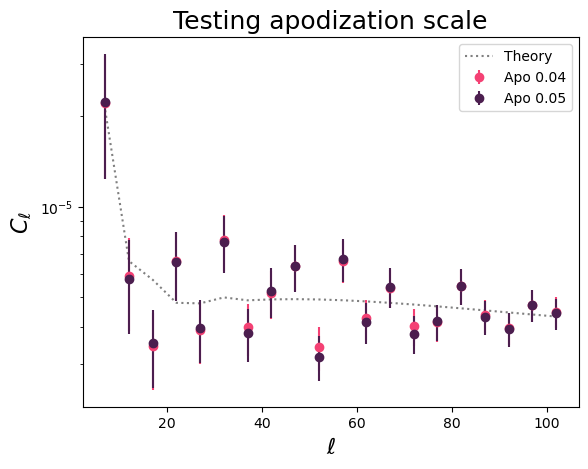

In [14]:
plt.figure()
plt.plot(lbin_theory[lbin_theory<lmax], Cl_theory_gg[lbin_theory<lmax], label = "Theory", color = "grey", linestyle = ":")
plt.errorbar(lbin, Cl_overall_04, yerr=sigma_overall_04, fmt='o', label="Apo 0.04", color="#F44174")
plt.errorbar(lbin, Cl_overall_norm, yerr=sigma_overall_norm, fmt='o', label="Apo 0.05", color="#4C1E4F")
plt.yscale("log")
plt.title("Testing apodization scale", fontsize = 18)
plt.xlabel(r"$\ell$", fontsize = 16)
plt.ylabel(r"$C_\ell$", fontsize = 16)
plt.legend();

## Weights

In [15]:
_, Cl_no_w, sigma_no_w = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.05_comp0.0_cutoff0.2_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormFalse_old_default.txt", unpack = True)

Cl_no_w = Cl_no_w[mask]
sigma_no_w = sigma_no_w[mask]

_, Cl_lin_w, sigma_lin_w = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.05_comp0.0_cutoff0.2_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormFalse_old_default_addLIN.txt", unpack = True)

Cl_lin_w = Cl_lin_w[mask]
sigma_lin_w = sigma_lin_w[mask]

_, Cl_rf_w, sigma_rf_w = np.loadtxt("results/Clgg_A_v1.5_lmax6144_mapC2s0.05_comp0.0_cutoff0.2_desi_dr1_0.80_z_2.10_PR4_PR4mask_lmin5_binsize5_sepnormFalse_old_default_addRF.txt", unpack = True)

Cl_rf_w = Cl_rf_w[mask]
sigma_rf_w = sigma_rf_w[mask]

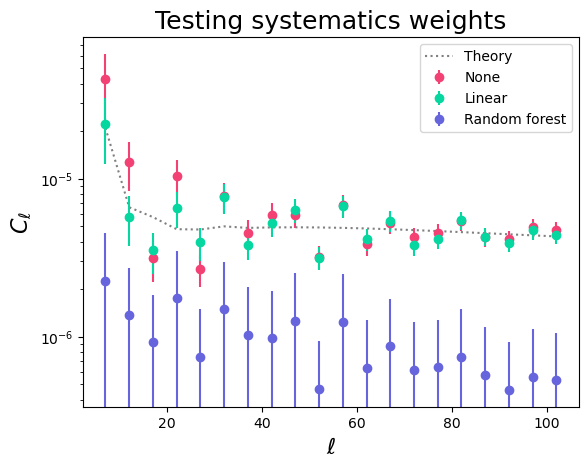

In [16]:
plt.figure()
plt.plot(lbin_theory[lbin_theory<lmax], Cl_theory_gg[lbin_theory<lmax], label = "Theory", color = "grey", linestyle = ":")
plt.errorbar(lbin, Cl_no_w, yerr=sigma_no_w, fmt='o', label="None", color="#F44174")
plt.errorbar(lbin, Cl_lin_w, yerr=sigma_lin_w, fmt='o', label="Linear", color="#06D6A0")
plt.errorbar(lbin, sigma_rf_w, yerr=sigma_rf_w, fmt='o', label="Random forest", color="#6665DD")
plt.yscale("log")
plt.title("Testing systematics weights", fontsize = 18)
plt.xlabel(r"$\ell$", fontsize = 16)
plt.ylabel(r"$C_\ell$", fontsize = 16)
plt.legend();